**Kelvin Fung**<br>
**YSC4216 Machine Learning**<br>
**Assignment 2: Regression Using MAP and Basis Functions**

Link to assignment:
    
https://tanrobby.github.io/teaching/ync_machine_learning/assignment2.html

# Part 1: MAP 

1. Generate 50 2D-data points using the following function: $y = sin(x^2 + 1)$
2. Add Gaussian random noise to the data
3. Show original curve line and the noisy data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

%matplotlib inline

In [2]:
# Functions to generate data
def actual_distribution(num_points=50):
    x_act = np.linspace(0, 1, num=num_points)
    y_act = np.sin(np.power(x_act, 2) + 1)
    
    return (x_act, y_act)

def add_noise(y_act, sig=.05):
    mu = 0
    noise = np.random.normal(mu, sig, len(y_act))
    
    return y_act + noise

In [3]:
x_act, y_act = actual_distribution(50)
y_noise = add_noise(y_act, .05)

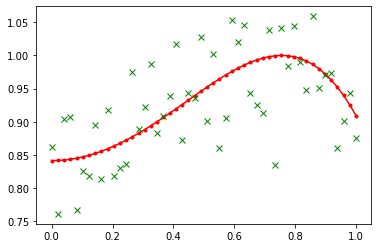

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_act, y_act, '-ro', markersize=3, label='Original curve')
ax.plot(x_act, y_noise, '-gx', linestyle='none', label='Noisy data')

4. Fit the generated noisy data using the MAP as discussed in class.

In [5]:
def map_polynomial(x_act, y_noise, M, alpha=1, beta=1):
    X = np.matrix([[np.power(x, i) for i in range(M)] for x in x_act])
    inv = linalg.inv(X.T*X + np.diag(np.array([alpha/beta for i in range(M)])))
    return inv * X.T * np.matrix(y_noise).T

In [6]:
w_poly = map_polynomial(x_act, y_noise, 10, 0.5, 1)

5. Compute and display the total absolute error value of using the computed w.

In [7]:
def map_poly_estimated(w, x_act):
    X = np.matrix([[np.power(x, i) for i in range(w.shape[0])] for x in x_act])
    Y = X*w
    
    return Y.A1  # Flatten Nx1 matrix into array of size N

In [8]:
y_poly_est = map_poly_estimated(w_poly, x_act)

In [9]:
def get_absolute_error(y_act, y_est):
    return sum(np.abs(y_est - y_act))

In [11]:
get_absolute_error(y_act, y_poly_est)

0.5411136952624187

6. Display estimated values of w.

In [12]:
w_poly

matrix([[ 0.81297892],
        [ 0.22511379],
        [ 0.06394438],
        [ 0.00233278],
        [-0.02264416],
        [-0.03323115],
        [-0.03792322],
        [-0.04006679],
        [-0.04101521],
        [-0.04133107]])

7. Experiment with your code by changing M and alpha.

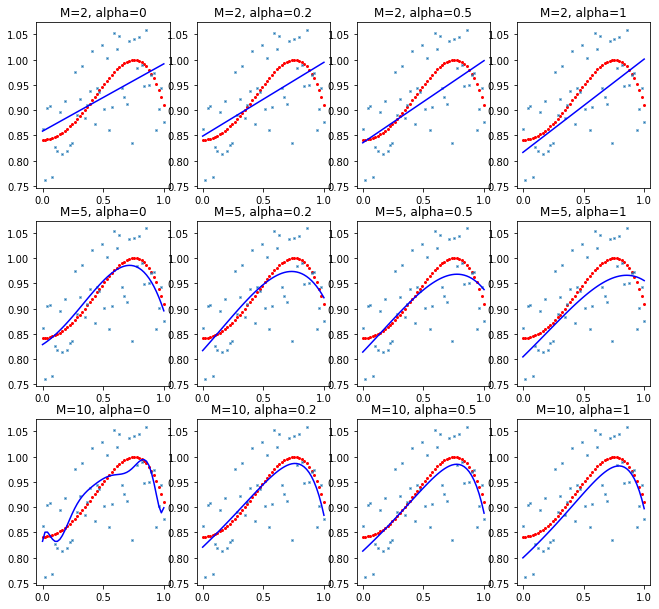

In [13]:
M_values = [2, 5, 10]
alpha_values = [0, 0.2, 0.5, 1]
plot_num = 1

fig=plt.figure(figsize=[11, 14])
for M in M_values:
    for alpha in alpha_values:
        y_est = map_poly_estimated(map_polynomial(x_act, y_noise, M, alpha, 1),
                                   x_act)
        
        ax = fig.add_subplot(4, 4, plot_num)
        plot_num += 1
        
        ax.plot(x_act, y_act, 'ro', markersize=2)   # Original curve
        ax.plot(x_act, y_noise, 'x', markersize=2)  # Noisy data
        ax.plot(x_act, y_est, 'b')                  # Fitted curve
        
        ax.set(title="M={}, alpha={}".format(M, alpha))

8. From the experiment in #7, discuss how M and alpha influence the fitting accuracy.

When alpha=0, we have a case of least squares regression. Therefore, when M is small there is a case of underfitting, and when M is large there is a case of overfitting. As the value of alpha increases, the effect on fitting accuracy depends on whether M is large. When M is small, the model is underfitted. Hence changing the value of alpha does not improve fitting accuracy. However, when the model is overfitted, which is the case when M is large, then changing the value of alpha increases fitting accuracy and reduces the problem of overfitting. In particular, we can see how when M=10 and alpha=0, the model is overfitted, but when M=10 and alpha=0.2, the model is not overfitted.

# Part 2: Basis Functions 

1. Generate 50 2D-data points using the following function: $y = sin(x^2 + 1)$.
2. Add Gaussian random noise to the data.

In [14]:
x_act_b, y_act_b = actual_distribution(50)
y_noise_b = add_noise(y_act_b, .05)

3. Fit the generated noisy data using the MLE that employs **Gaussian basis functions**.

In [16]:
def gaussian_basis(x, miu, sigma):
        return np.exp(-np.power(x-miu, 2) / (2*np.power(sigma, 2)))

In [27]:
def mle_basis(x_act_b, y_noise_b, M, s, basis_function):
    
    phi = np.matrix([[1] + [basis_function(x, n*s, s) for n in range(M-1)] 
                     for x in x_act_b])
    w = linalg.inv(phi.T * phi) * phi.T * np.matrix(y_noise_b).T
    
    y_est = (phi * w).A1  # Flatten Nx1 matrix into array of size N
    
    return w, y_est

4. Show your resuls for different values of M that generate overfitting and underfitting curves.

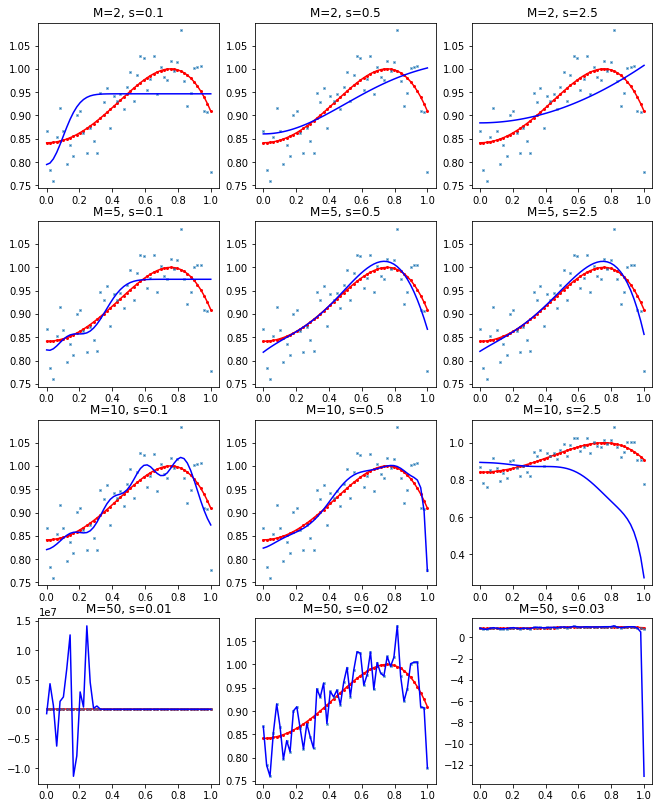

In [63]:
M_values_gau = [2, 5, 10]
s_values_gau = [.1, .5, 2.5]
s_values_small = [.01, .02, .03]
plot_num = 1

fig=plt.figure(figsize=[11, 14])
for M in M_values_gau:
    for s in s_values_gau:
        _, y_est = mle_basis(x_act_b, y_noise_b, M, s, gaussian_basis)
        
        ax = fig.add_subplot(4, 3, plot_num)
        plot_num += 1
        
        ax.plot(x_act_b, y_act_b, '-ro', markersize=2)   # Original curve
        ax.plot(x_act_b, y_noise_b, 'x', markersize=2)  # Noisy data
        ax.plot(x_act_b, y_est, 'b')                  # Fitted curve
        
        ax.set(title="M={}, s={}".format(M, s))
        
for s in s_values_small:
    _, y_est = mle_basis(x_act_b, y_noise_b, 50, s, gaussian_basis)
    
    ax = fig.add_subplot(4, 3, plot_num)
    plot_num += 1
    
    ax.plot(x_act_b, y_act_b, '-ro', markersize=2)   # Original curve
    ax.plot(x_act_b, y_noise_b, 'x', markersize=2)  # Noisy data
    ax.plot(x_act_b, y_est, 'b')                  # Fitted curve

    ax.set(title="M={}, s={}".format(50, s))

When M=2, regardless of the value of s, the model is underfitted. On the other hand, when M=50 and s=0.02, we see that the estimated line passes through every point. This is a case of overfitting.

5. Change the basis functions to the **sigmoid basis functions**, and show the results for different values of M that generate overfitting and underfitting curves.

In [30]:
def sigmoid_basis(x, miu, sigma):
    z = (x-miu) / sigma
    return 1 / (1 + np.exp(-z))

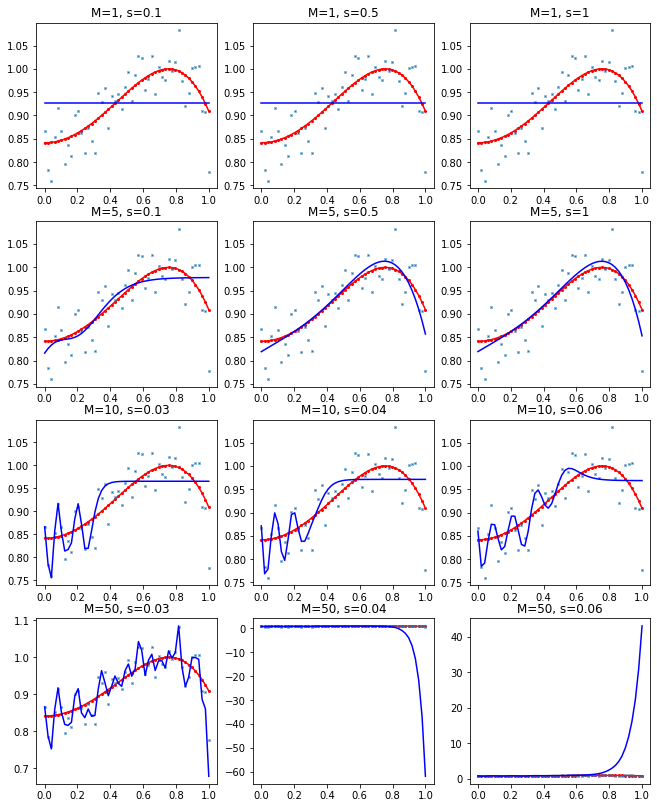

In [64]:
M_values_sig = [1, 5]
s_values_sig = [.1, .5, 1]

M_values_large = [10, 50]
s_values_small = [.03, .04, .06]
plot_num = 1

fig=plt.figure(figsize=[11, 14])
for M in M_values_sig:
    for s in s_values_sig:
        _, y_est = mle_basis(x_act_b, y_noise_b, M, s, sigmoid_basis)
        
        ax = fig.add_subplot(4, 3, plot_num)
        plot_num += 1
        
        ax.plot(x_act_b, y_act_b, '-ro', markersize=2)   # Original curve
        ax.plot(x_act_b, y_noise_b, 'x', markersize=2)  # Noisy data
        ax.plot(x_act_b, y_est, 'b')                  # Fitted curve
        
        ax.set(title="M={}, s={}".format(M, s))

for M in M_values_large:
    for s in s_values_small:
        _, y_est = mle_basis(x_act_b, y_noise_b, M, s, sigmoid_basis)

        ax = fig.add_subplot(4, 3, plot_num)
        plot_num += 1

        ax.plot(x_act_b, y_act_b, '-ro', markersize=2)   # Original curve
        ax.plot(x_act_b, y_noise_b, 'x', markersize=2)  # Noisy data
        ax.plot(x_act_b, y_est, 'b')                  # Fitted curve

        ax.set(title="M={}, s={}".format(M, s))

When M=2, regardless of the value of s, the model is underfitted. Conversely, when M=10 and M=50, the model is overfitted, and we can see how the estimated curve passes through many of the noisy data. 

6. Change the original curve function to $y=0.4345x^3 - 5.607x^2 + 16.78x - 10.61$, and use the sigmoid basis function to estimate the best curve fitting from the noisy data.

In [36]:
def poly_distribution(num_points=50):
    x_act = np.linspace(0, 9, num=num_points)
    y_act = 0.4345*np.power(x_act, 3) - 5.607*np.power(x_act, 2) + \
            16.78*x_act - 10.61
    return (x_act, y_act)

In [39]:
x_act_c, y_act_c = poly_distribution(50)
y_noise_c = add_noise(y_act_c, 4)

[[-166.87697282]
 [ 619.12469426]
 [-522.15890644]
 [-333.12413372]
 [ 564.59965845]]


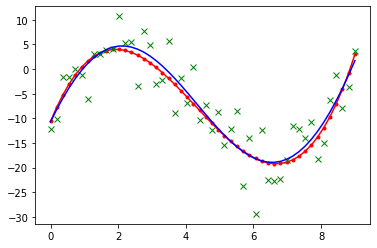

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

w, y_est_c = mle_basis(x_act_c, y_noise_c, 5, 3, sigmoid_basis)
print(w)
ax.plot(x_act_c, y_act_c, '-ro', markersize=3, label='Original curve')
ax.plot(x_act_c, y_noise_c, '-gx', linestyle='none', label='Noisy data')
ax.plot(x_act_c, y_est_c, 'b', label='Estimated curve')

7. Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions.

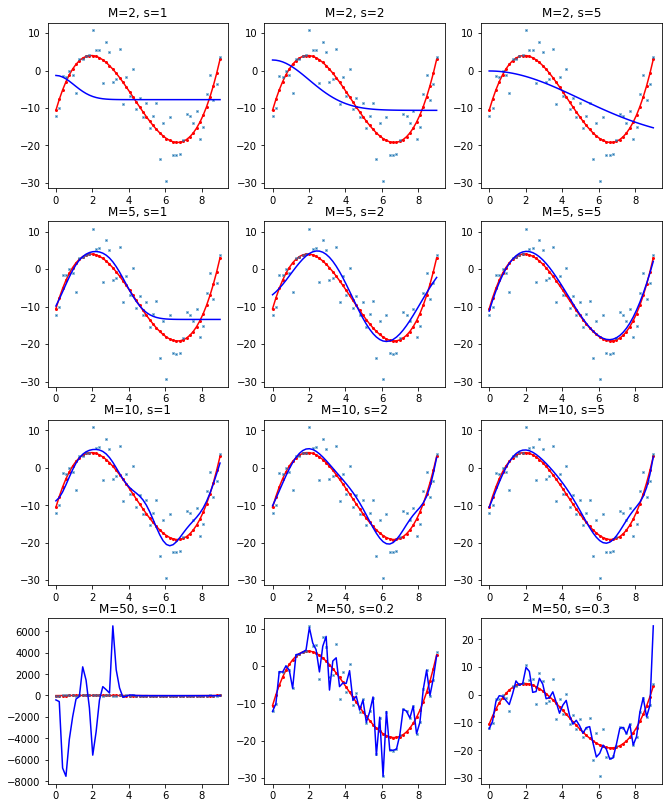

In [71]:
M_values_gau = [2, 5, 10]
s_values_gau = [1, 2, 5]
s_values_small = [.1, .2, .3]

plot_num = 1

fig=plt.figure(figsize=[11, 14])
for M in M_values_gau:
    for s in s_values_gau:
        _, y_est = mle_basis(x_act_c, y_noise_c, M, s, gaussian_basis)
        
        ax = fig.add_subplot(4, 3, plot_num)
        plot_num += 1
        
        ax.plot(x_act_c, y_act_c, '-ro', markersize=2)  # Original curve
        ax.plot(x_act_c, y_noise_c, 'x', markersize=2)  # Noisy data
        ax.plot(x_act_c, y_est, 'b')                    # Fitted curve
        
        ax.set(title="M={}, s={}".format(M, s))
        
for s in s_values_small:    
    _, y_est = mle_basis(x_act_c, y_noise_c, 50, s, gaussian_basis)
    
    ax = fig.add_subplot(4, 3, plot_num)
    plot_num += 1
    
    ax.plot(x_act_c, y_act_c, '-ro', markersize=2)   # Original curve
    ax.plot(x_act_c, y_noise_c, 'x', markersize=2)   # Noisy data
    ax.plot(x_act_c, y_est, 'b')                     # Fitted curve

    ax.set(title="M={}, s={}".format(50, s))

One advantage of using basis functions over polynomial functions is that when we set M to a high value, polynomial functions will cause numerical problems (e.g., when we have M=50 leading to a huge number $x^{50}$).

Another advantage of using basis functions, in particular the radial basis function is that it is easy to process input data that has high dimensionality by using multivariate Gaussian distribution.